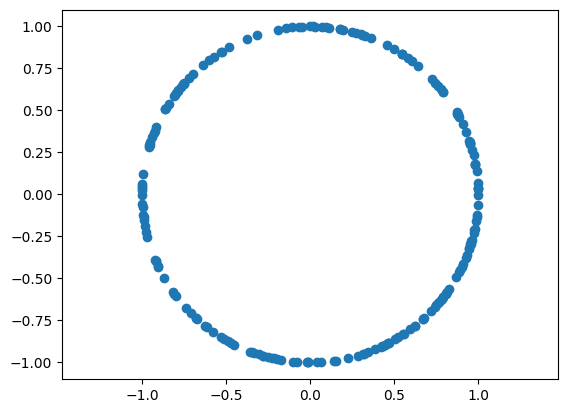

In [26]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

def circle(theta, r=5.):
    return r * jax.numpy.cos(theta), r * jax.numpy.sin(theta)

def plot_circle(r, theta):
    x, y = circle(theta, r)
    plt.scatter(x, y)
    plt.axis('equal')
    plt.show()
    
def plot_whole_cirle(r):
    theta = jax.numpy.linspace(0, 2 * jax.numpy.pi, 100)
    plot_circle(r, theta)
    

key = jax.random.PRNGKey(0)
distributed_theta = jax.random.uniform(key, (100, 2), minval=0, maxval=2 * jax.numpy.pi)
plot_circle(1, distributed_theta)




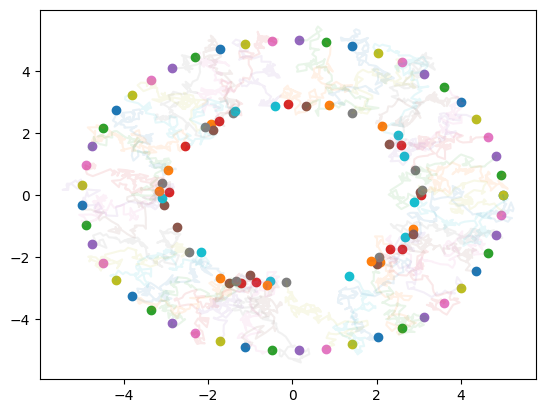

In [27]:
from experiments.plotting import restore_checkpoint_ScoreMLP
from src.data_generate_sde import utils, sde_bm

path = "/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/bm/circle_uniformly_distributed_endpt_r_3"

trained_score, sde = restore_checkpoint_ScoreMLP(path)
drift, diffusion = sde_bm.vector_fields()
ts = utils.time.grid(0, 1., 100)
num_trajectories = 50

# x0 = (0., -0.)

x0 = jax.vmap(circle)(jnp.linspace(0, 2*jnp.pi, num_trajectories))

keys = jax.random.split(key, num_trajectories)

trajs = jax.vmap(utils.conditioned, in_axes=(0, None, 0, None, None, None))(keys, ts, x0, trained_score, drift, diffusion)

for traj in trajs:
    plt.plot(traj[:, 0], traj[:, 1], alpha=0.1)
    plt.scatter(traj[0, 0], traj[0, 1])
    plt.scatter(traj[-1, 0], traj[-1, 1])
plt.show()




